In [1]:
# import das bibliotecas necessarias:
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

# bibliotecas para pintar prismas!
from matplotlib.path import Path
from matplotlib.patches import PathPatch

In [2]:
# path referente aa localizacao do modulo:
sys.path.append('/home/rodbijani/Documents/UFF/graduacao/IC/BrunoLima/IC-UFF/modules') # pc do Bijani
#sys.path.append('C:/Users/bruno/Documents/Projeto - Bijani/GitHub/IC-UFF/modules') # pc do Bruno

In [3]:
# Import da biblioteca externa:
from plots import plots_rectangles
from plots import plots_paint_rectangles

# Tarefa : 
> Plotar prismas de acordo com os dados fornecidos que são o número de observações e as dimensões referentes aos prismas. Neste caso, estamos considerando prismas de mesmas dimensões. Posteriormente, iremos diferenciar os prismas entre si. (OK)

In [4]:
# Coletando os limites em x e z do levantamento sintético:
nobs = 10 # número de observações
zmin = 0.0 # limite mínimo em z do levantamento sintético
zmax = 10.0 # limite máximo em z do levantamento sintético
xmin = 0.0 # limite mínimo em x do levantamento sintético
xmax = 100.0 # limite máximo em x do levantamento sintético

In [5]:
# definindo as coordenadas sinteticas do levantamento:
x = np.linspace(xmin, xmax, nobs, endpoint=True)
# é possível gerar valores para z de três formas distintas com as 4 linhas abaixo
z = np.linspace(0, 0, nobs, endpoint=True)
#z = np.zeros( len(x) )
#for i in range( len(x) ):
#    z[i] = random.uniform(0.0, -10.0)

print(x[1]-x[0])

11.11111111111111


In [6]:
# cálculo do valor que deve ser somado ou subtraido aos pontos de observação para se ter as coordenadas x dos retângulos:
xmed = ( x[0] + x[1] ) / 2.0
x_prisma = abs( x[0] - ( xmed ) )

print (x_prisma)

5.555555555555555


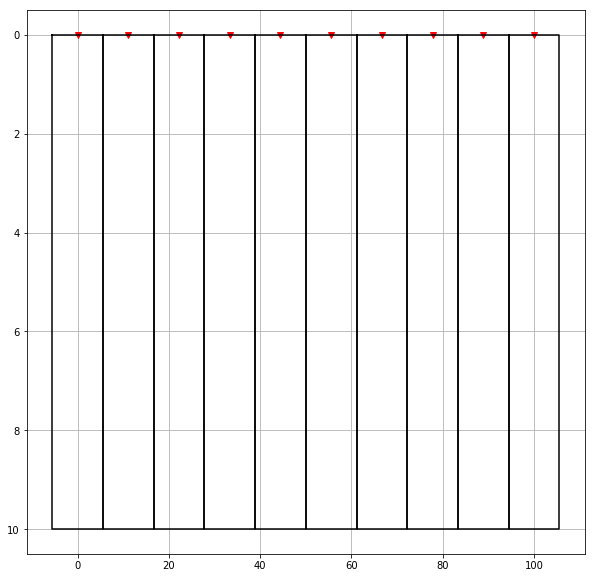

In [7]:
# Visualização gráfica:
plt.figure( figsize=(10,10) )
plt.plot(x,z,'vr')

for i in range (nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
plt.gca().invert_yaxis()
plt.show()

# os triângulos vermelhos consideram o relevo que pode ser a vir adicionado mais a frente dependendo do caso

# Tarefa:
> Testar a funcao plots_rectangles com o objetivo de representar um ambiente qualquer por retângulos: (OK)

In [8]:
# definicao das profundidades de cada prisma (a posteriori, sera o resultado obtido)
# é possível gerar valores para p de duas formas distintas com as 4 linhas abaixo
#p = np.linspace(2.0, 20.0, len(x), endpoint=True )
p = np.zeros( len(x) )
for i in range( len(x) ):
    p[i] = random.uniform(10.0, 20.0)

print( p )

[17.21774416 11.54566996 13.9802077  14.51217133 19.44427947 18.60227949
 14.59838727 16.59169782 13.92155062 19.17607737]


In [9]:
# definindo os valores de constraste de densidade
cden = np.zeros( len(x) )
for i in range( len(x) ):
    cden[i] = random.uniform(0.0, 30.0) 
print( cden )

[29.1277964   1.73924561  1.08768693 20.264692   21.60699097  7.49273741
 16.13825258  8.72647511 18.12473021 25.21383298]


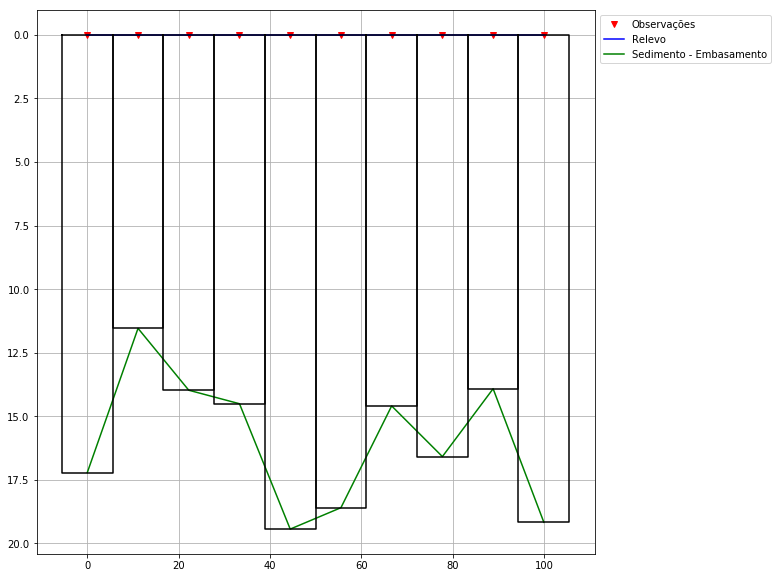

In [10]:
# teste da função plots_rectangles
x_coord, z_coord = plots_rectangles(x, z, p, color1='blue', color2='black', color3='green')

# Tarefas:
> (1) Ajustar o negocio ai (grafico) para observacoes que simulam um relevo (zo variavel) (OK, foi ajustado acima) <br> 
> (2) Preencher cada retangulo com cores, onde cada cor representa um contraste de densidade (OK) ($g/cm^3$)

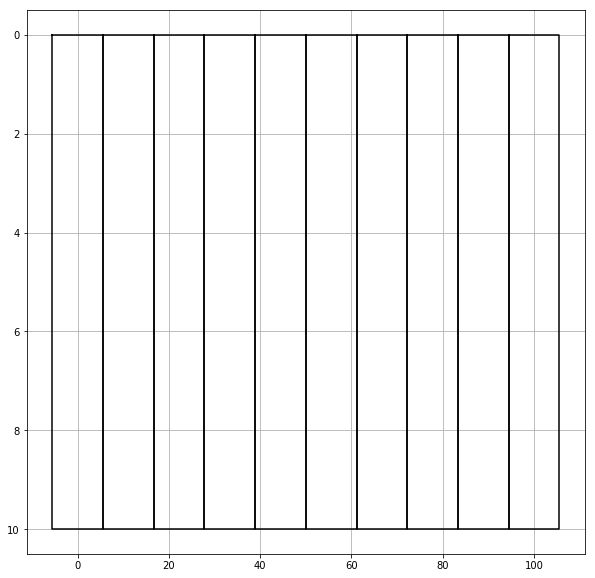

In [11]:
# inicio do desenvolvimento do raciocínio para preencher os retângulos com cores
# Visualização gráfica:
plt.figure( figsize=(10,10) )

for i in range(nobs):
    plt.plot((x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma), 
             (zmin, zmin, zmax, zmax, zmin), 'black')

plt.grid()
plt.gca().invert_yaxis()
plt.show()

i = 0 => [12.80087134  4.20740032 23.82448924  8.17312024 23.10828073]
i = 1 => [15.76097987  0.28095916 14.45843684  1.77744232  1.93703107]
i = 2 => [24.79656866 14.51599483  8.71998149 27.80561784  8.9902781 ]
i = 3 => [19.87300559 16.24561862 13.88453637  8.93153128 11.33997526]
i = 4 => [18.22811026 12.78249258 28.07502765 12.32578132  0.57414011]
i = 5 => [19.16130087  9.14045674 14.71274259 11.58700704  8.33733812]
i = 6 => [ 6.31231379  6.27866413 24.58215072 12.11514329 21.92811656]
i = 7 => [19.00390096 21.08316657  0.61217982 20.27315506 24.16806067]
i = 8 => [27.14585041 20.81391857 15.4811972  29.45826261 17.12329292]
i = 9 => [22.50074814  0.02322026  6.72088614 21.28718663  2.36795515]


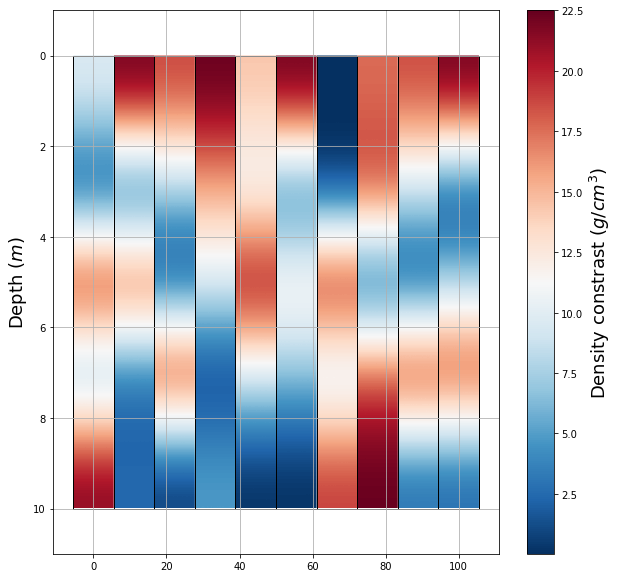

In [12]:
# Colorindo os primas de acordo com os valores de contraste de densidade usando plt.imshow
plt.figure( figsize=(10,10) )

beta = 3.7 # valor do coeficiente de decaimento para a fórmula do constraste de densidade
rho0 = 2.78 # valor do constraste de densidade da superfície para a fórmula do constraste de densidade

for i in range(nobs):    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    cden = np.zeros( len(xp) )
    for j in range( len(xp) ): # construindo um vetor com valores de constraste de densidade aleatórios
        #zz = np.linspace( 0.0, p[i], len(xp), endpoint=True )
        #cden[j] = rho0 * beta**2/( beta + zz[j] )**2 # aplicação da fórmula do constraste da densidade 
        cden[j] = random.uniform(0.0, 30.0)
    print('i =',i,'=>',cden) # apenas sendo usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=min(cden), vmax=max(cden),
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    
    ############ INICIO DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ##############
    # os valores de mi e ma serão usados para definir os extremos da escala de cor do plt.imshow no próximo code
    # lista1 salvará todos os valores de contraste de densidade gerados para serem usados no próximo code
    if i == (nobs - 1):
        mi = min(cden)
        ma = max(cden) 
    if i == 0: 
        lista1 = [cden]
    else:    
        lista1.append(cden)
    ############## FIM DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ################
        
# se a colorbar for colocada dentro do for, será possível ver que é adotada uma escala de cor para cada prisma separado
# pelo comentário acima, foi visto uma necessidade de padronizar essa colorbar
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) # retirar esse comando, interfere na visualização
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 2 => [24.79656866 14.51599483  8.71998149 27.80561784  8.9902781 ]


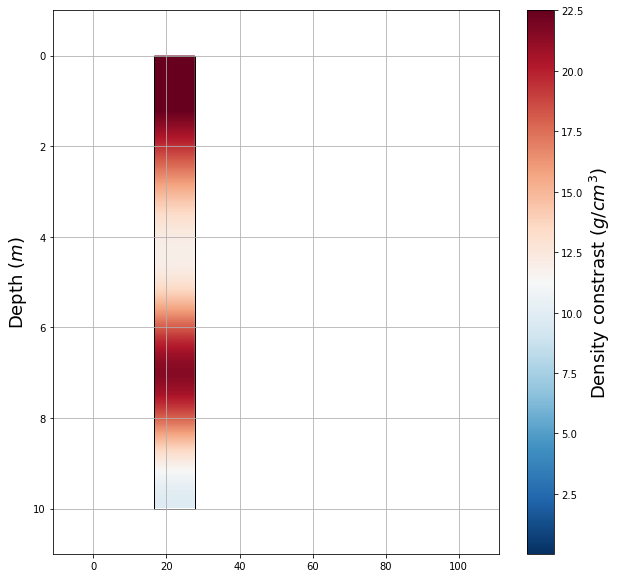

In [13]:
# Conferindo a colorbar para cada prisma (ATUALIZANDO)
# A função desse code é apenas validar o code anterior
# Se o code anterior for rodado, então esse deve ser também para as comparações serem feitas corretamente
plt.figure( figsize=(10,10) )

i = 2 # alterar isso para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
zp = np.array([zmin, zmin, zmax, zmax, zmin])

cden = np.array(lista1[i]) 
print('i =',i,'=>',cden) # apenas sendo usado para confirmar mais facilmente a escala de cor

path = Path(np.array([xp,zp]).T)
patch = PathPatch(path, facecolor='none')
    
plt.gca().add_patch(patch)
fs = 18 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs)
    
im = plt.imshow(cden.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=mi, vmax=ma,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) 
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 0 => [22.958200838271736, 23.559076388281913, 18.911236966034895, 13.601245687742551, 12.798608224346573]
i = 1 => [1.7425605416814927, 25.294673813147064, 8.945804114819039, 20.065124288972854, 13.915049382948549]
i = 2 => [6.118817794691824, 7.874132159511223, 11.254225609653725, 13.921073595292516, 24.27585637994313]
i = 3 => [11.437691724273314, 24.760576635366323, 7.169867965040187, 4.771423883320215, 5.926875142024195]
i = 4 => [16.56039310977095, 18.683306816637174, 12.978030142589684, 18.793548595642914, 17.949544175775657]
i = 5 => [6.617882120217495, 28.115000882018204, 13.144115744191488, 2.609990078739779, 26.673804091525266]
i = 6 => [20.262369723251638, 4.1774321412023285, 4.644104223180751, 26.217104219641712, 6.701004838301698]
i = 7 => [15.446261015442374, 9.989817865426652, 6.247769808909153, 11.115154140600435, 15.224245679222898]
i = 8 => [25.790295540110527, 18.459042628532845, 20.422805691019185, 12.45737321558434, 26.284908327775753]
i = 9 => [12.975948682571

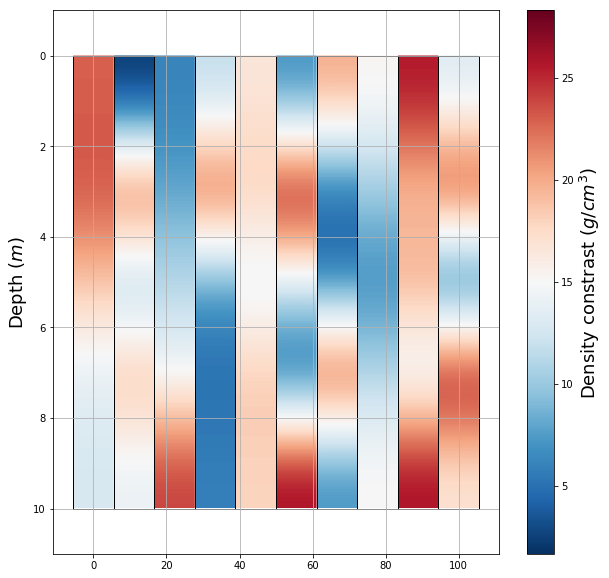

In [14]:
# Colorindo os primas de acordo com os valores de contraste de densidade usando plt.imshow (ATUALIZADO)
plt.figure( figsize=(10,10) )

cden = []
for i in range (nobs):
    # gerando valores aleatórios para contraste de densidade
    # salvando os valores máximos e mínimos de contraste de densidade para a escala de cor de plt.imshow
    for j in range( len(xp) ): 
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
        
        if j == 0 and i == 0: 
            cden_min = value
            cden_max = value
        else:
            if value > cden_max:
                cden_max = value
            if value < cden_min:
                cden_min = value
    print('i =',i,'=>',cden[i]) # apenas usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente

for i in range (nobs):
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    zp = np.array([zmin, zmin, zmax, zmax, zmin])
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    cden_part = np.array( cden[i] ) # Isolando apenas os dados do contraste de densidade que serão usados nesse for  
    
    im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)
    
    ############ INICIO DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ##############
    # os valores de mi2 e ma2 serão usados para definir os extremos da escala de cor do plt.imshow no próximo code
    if i == (nobs - 1):
        for j in range ( len(xp) ):
            if j == 0:
                mi2 = cden[i][j]
                ma2 = cden[i][j]
            else:
                if cden[i][j] > ma2:
                    ma2 = cden[i][j]
                if cden[i][j] < mi2:
                    mi2 = cden[i][j]
    ############## FIM DO TRECHO USADO APENAS PARA COLETAR DADOS DE REFERENCIA PARA O PROXIMO CODE ################
        
cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim([x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma]) # retirar esse comando, interfere na visualização
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

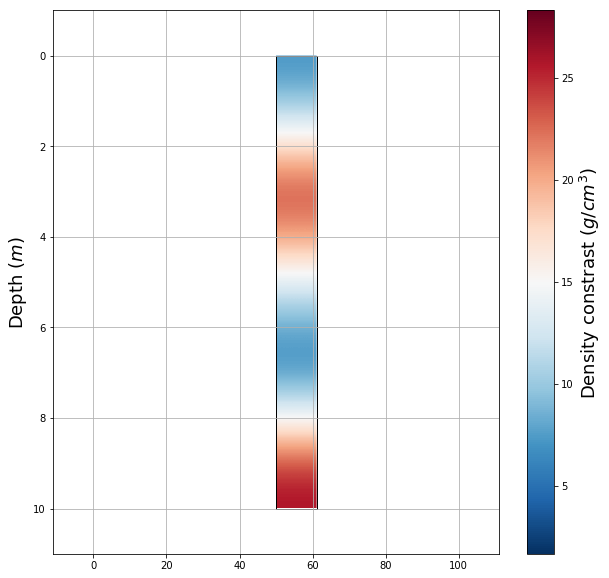

In [15]:
# Conferindo a colorbar para cada prisma (ATUALIZADO)
# A função desse code é apenas validar o code anterior
# Se o code anterior for rodado, então esse deve ser também para as comparações serem feitas corretamente
plt.figure( figsize=(10,10) )

i = 5 # alterar isso para ajustar qual barra será comparada !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
zp = np.array([zmin, zmin, zmax, zmax, zmin])

path = Path(np.array([xp,zp]).T)
patch = PathPatch(path, facecolor='none')
    
plt.gca().add_patch(patch)
fs = 18 # font size for the label
plt.ylabel('Depth $(m)$',fontsize=fs)

cden_part = np.array( cden[i] )
im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim([x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma])
plt.ylim( zmax + 1, zmin - 1 )

plt.grid()
plt.show()

i = 0 => [1.2053529203701319, 12.459778976900841, 18.298017307503912, 19.45846034233076, 4.0166422035176215]
i = 1 => [13.82241222264393, 14.364244647860463, 7.684925418473945, 9.296480001675762, 22.069084866092698]
i = 2 => [18.20639498661803, 27.95362777900035, 14.529604461747102, 12.749506570710631, 25.789188719060945]
i = 3 => [5.12293636486133, 21.05514753822626, 18.020705991752372, 1.8293445135540465, 21.045161753911632]
i = 4 => [9.705510312175198, 21.221750092519198, 8.200601071850901, 4.345437436319994, 9.732874870688734]
i = 5 => [24.607333166890967, 19.991826808006326, 14.735181812737931, 2.6219756627639548, 2.4690992564175165]
i = 6 => [10.2823788052133, 19.200041851718257, 1.9987232869948834, 20.24175022162207, 20.997047096964568]
i = 7 => [23.990330097339296, 12.286638323770607, 24.569534500315807, 11.921667700935624, 17.088627637119835]
i = 8 => [19.118876621339844, 20.136991012070816, 27.98159762885259, 27.550512271955014, 22.20769477700135]
i = 9 => [1.1463759433501075

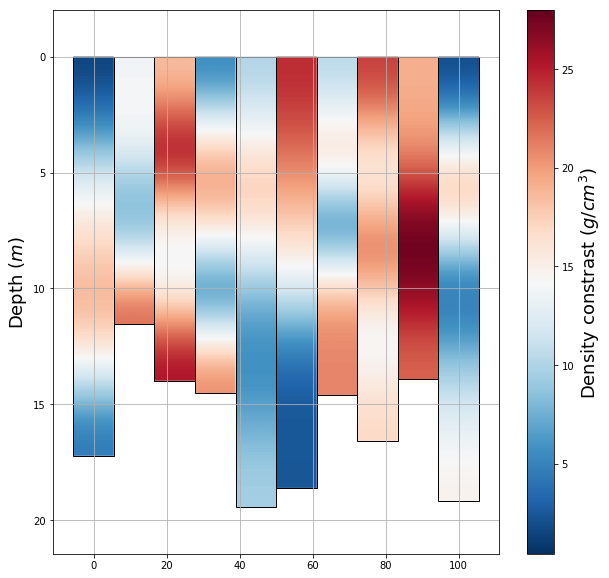

In [16]:
# Aplicando o relevo aos prismas já coloridos devidamente com o plt.imshow
plt.figure( figsize=(10,10) )

cden = []
for i in range (nobs): 
    # gerando valores aleatórios para contraste de densidade
    # salvando os valores máximos e mínimos de contraste de densidade para a escala de cor de plt.imshow
    for j in range( 5 ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
        
        if j == 0 and i == 0:
            cden_min = value
            cden_max = value
        else:
            if value > cden_max:
                cden_max = value
            if value < cden_min:
                cden_min = value
    print('i =',i,'=>',cden[i]) # apenas usado para confirmar mais facilmente a escala de cor até ela ser ajustada corretamente
     
for i in range (nobs): # pintando as áreas dos retângulos     
    zp = np.array([ z[i], z[i], z[i] + p[i] , z[i] + p[i], z[i] ])
    # salvando os valores máximos e mínimos de profundidade para definir melhor o intervalo do eixo y
    if i == 0:
        zmin2 = z[i] 
        zmax2 = z[i] + p[i]
    else:
        if z[i] + p[i]  > zmax2:
            zmax2 = z[i] + p[i]
        if z[i]  < zmin2:
            zmin2 = z[i] 
    
    xp = np.array([x[i] - x_prisma, x[i] + x_prisma, x[i] + x_prisma, x[i] - x_prisma, x[i] - x_prisma])
    
    path = Path(np.array([xp,zp]).T)
    patch = PathPatch(path, facecolor='none')
    
    plt.gca().add_patch(patch)
    fs = 18 # font size for the label
    plt.ylabel('Depth $(m)$',fontsize=fs)
    
    cden_part = np.array( cden[i] ) # Isolando apenas os dados do contraste de densidade que serão usados nesse for  
    
    im = plt.imshow(cden_part.reshape(np.size(zp),1), cmap='RdBu_r',interpolation="bicubic", 
                    vmin=cden_min, vmax=cden_max,
                    origin='lower',extent=[min(xp), max(xp), min(zp), max(zp)],
                    aspect="auto", clip_path=patch, clip_on=True)

cbar = plt.colorbar()
cbar.ax.set_ylabel('Density constrast $(g/cm^3)$', fontsize=fs)

plt.xlim( [ x[0] - 2 * x_prisma , x[nobs - 1] + 2 * x_prisma ] ) # retirar esse comando, interfere na visualização
plt.ylim(zmax2 + 2, zmin2 - 2)

plt.grid()
plt.show()

# Tarefa:
> Testar a função plots_paint_rectangles para plotar retângulos pintados de forma que representem o ambiente com uma certa fidelidade e que sejam pintados de acordo com alguma propriedade ou grandeza física das subperfícies que esteja em estudo. Essa função será testada em dois casos que são descritos abaixo. <br>
>> (1) Considerar essa propriedade ou grandeza física constante para cada retângulo (OK) <br>
>> (2) Considerar essa propriedade ou grandeza física variando para cada retângulo (OK)

## TODO:
> (1) Generalizar o numero de pontos (elementos de var) dentro de cada prisma para plotagem (refinar as cores) (OK)<br>
> (2) A pessoa estipula a nivel de referencia que deseja utilizar para a posicao do topo de cada prismas. (Essa é uma questão que foi deixada de lado, pois não era o foco do momento)

i = 0 => [21.594948815058824, 11.863190459099508, 14.713842545757478, 9.537707076327104, 28.60290332079672]
i = 1 => [17.292496551440347, 16.24674181405166, 15.527276340348394, 21.430073272033965, 24.9308389151388]
i = 2 => [4.5470827325085725, 10.822604955277253, 24.423817164438166, 0.4379081640215765, 0.8090601123786456]
i = 3 => [14.352878165832283, 27.741985816965734, 5.030329559694133, 18.5316730593471, 7.423859518687339]
i = 4 => [27.060871230872113, 6.523173569881199, 20.23945238082803, 28.895976838292423, 21.628317359905836]
i = 5 => [0.9521012694336473, 28.75862339976165, 5.859455920352952, 12.15881807851021, 10.79295192814871]
i = 6 => [1.0107495256847832, 26.351280484930534, 18.08657586768837, 15.37113593674938, 3.8609291233342677]
i = 7 => [2.7679144998177607, 29.736157550087825, 19.845972045601346, 3.176055825938735, 17.993649429159564]
i = 8 => [1.515814917481415, 6.426315553194472, 2.585401672811517, 29.13232507240187, 15.90477536363702]
i = 9 => [9.088459813331156, 0.21

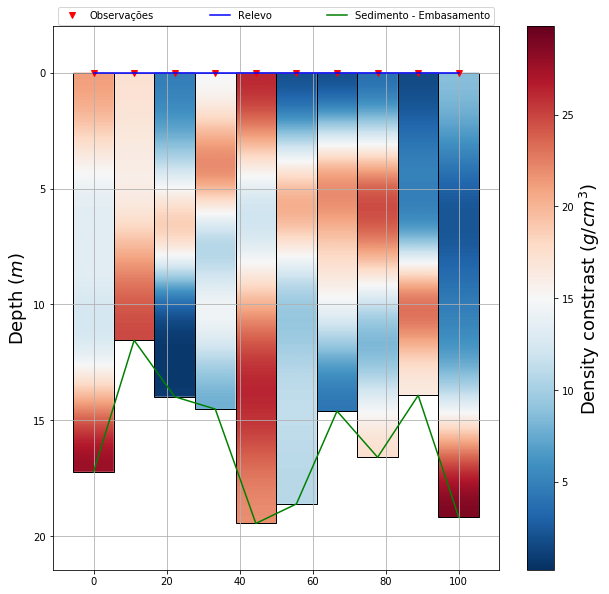

In [17]:
# Caso em que a propriedade ou grandeza física varia ou é constante para cada retângulo:
cden = []
n = 5
for i in range (nobs):
    for j in range( n ):
        if j == 0:
            value = random.uniform(0.0, 30.0)
            cden.append( [value] )
        else:
            value = random.uniform(0.0, 30.0)
            cden[i].append( value )
            
plots_paint_rectangles(x, z, p, n_var=n, var=cden, name='Density constrast $(g/cm^3)$', cmap='RdBu_r',
                       color1='blue', color2='green')

# Dúvidas:
> (1) Perguntar sobre o p. De acordo com a descrição na função, ele é a diferença entre o topo e a base do retangulo. Mas, ele foi usado como se fosse a difença entre a base do retângulo e uma linha de referência que foi o z = 0. O que seria o certo? (Inicialmente, vamos considerar apenas casos simples de levantamento terrestre. Então, o p representa a diferença entre o local que foi feito o levantamento, ou seja, o próprio topo do relevo, e o limite sedimento - embasamento) <br>
> (2) Perguntar sobre o reconhecimento da variável de uma função dentro da outra (OK)

In [ ]:
### USO DO ENUMERATE PARA EVENTUAIS LOOPS MULTIPLOS
A = np. ones( (2,5) )
A[0,:] = 5.0

In [ ]:
for i,j in enumerate(A):
    print(i)